In [1]:
from tensorflow import keras
import tensorflow as tf

In [2]:
# Importar os datasets 

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype) # Scikit-Learn would've given us a collection of floats

(60000, 28, 28)
uint8


In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]
'Coat'

'Coat'

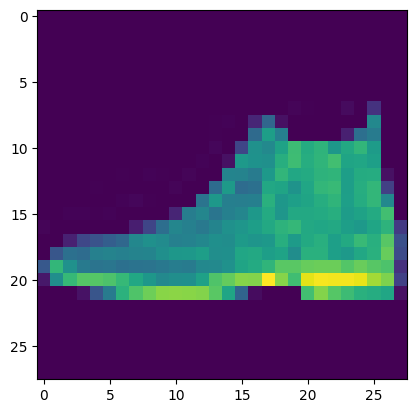

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
img = X_test[0]
plt.imshow(img)

# Modelo MLP (Multi Layer Perceptron)

In [7]:
# INPUT LAYER = shape de 28x28 para transformar em um vetor de 1 dimesão
# HIDDEN LAYER 1 = hidden layers com 300 neuronios, com função de ativação RELU
# HIDDEN LAYER 2 = hidden layers com 100 neuronios, com função de ativação RELU
# OUT LAYER = função de ativação SOFTMAX

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer="glorot_uniform", kernel_regularizer='l2',activation='relu'),
    keras.layers.Dense(100, kernel_initializer="glorot_uniform",kernel_regularizer='l2', activation='relu'),
    keras.layers.BatchNormalization(synchronized=True),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer='l2'),
])

In [8]:
# Informações sobre o Modelo Criado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 267010 (1.02 MB)
Trainable params: 266810 (1.02 MB)
Non-trainable params: 200 (800.00 Byte)
________________

In [9]:
# As camadas dos modelo
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name
layer1 = model.get_layer(hidden1.name)
weights,biases = hidden1.get_weights()

In [11]:
# Primeira HIDENN LAYER
layer1

In [12]:
# Pesos da Primeira HIDDEN LAYER 
weights

array([[ 0.04951347,  0.06156699,  0.03808694, ..., -0.07096963,
        -0.02639105,  0.00260794],
       [ 0.01122852, -0.00424597, -0.02197745, ..., -0.0542842 ,
        -0.02255788,  0.01149855],
       [ 0.02648661, -0.04984415,  0.07326168, ..., -0.03198591,
         0.02487729, -0.00052971],
       ...,
       [-0.01332381,  0.03837591,  0.03503829, ...,  0.034436  ,
         0.06865835, -0.01259506],
       [-0.07072829,  0.00182971,  0.0623087 , ..., -0.05515288,
        -0.0476424 ,  0.06672949],
       [ 0.00442977,  0.04948856,  0.05726022, ..., -0.032349  ,
        -0.06091984, -0.02853224]], dtype=float32)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 21s 9ms/step - loss: 27.7044 - val_loss: 27.5892
Epoch 2/30
1719/1719 [==============================] - 18s 10ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 3/30
1719/1719 [==============================] - 17s 10ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 4/30
1719/1719 [==============================] - 17s 10ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 7/30
1719/1719 [==============================] - 20s 12ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 8/30
1719/1719 [==============================] - 15s 9ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 9/30
1719/1719 [==============================] - 17s 10ms/step - loss: 27.6120 - val_loss: 27.5892
Epoch 10/30
1719/1719 [==========================

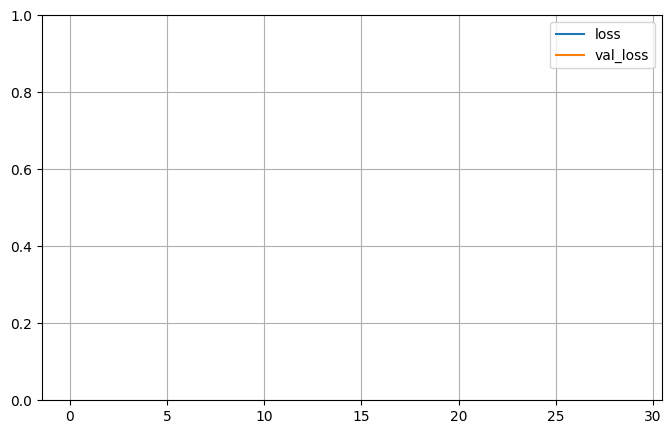

In [15]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [16]:
X_new = X_test[:5]
y_preds = model.predict(X_new)
y_preds.round(2)

1/1 [==============================] - 0s 322ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [17]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
#y_pred = model.predict_classes(X_new) removed this line because 

1/1 [==============================] - 0s 63ms/step


In [18]:
y_pred

array([9, 9, 9, 9, 9], dtype=int64)

In [19]:
# FAZER K-FOLD

In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Ankle boot', 'Ankle boot', 'Ankle boot',
       'Ankle boot'], dtype='<U11')

In [21]:
class_names
['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

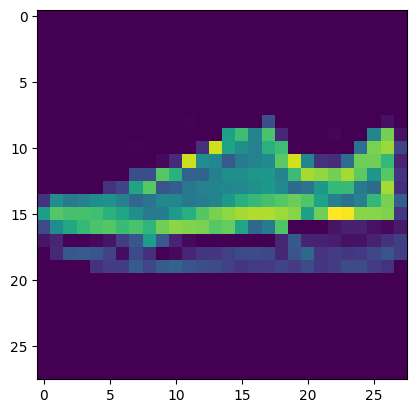

In [22]:
img1 = X_test[9]
plt.imshow(img1)

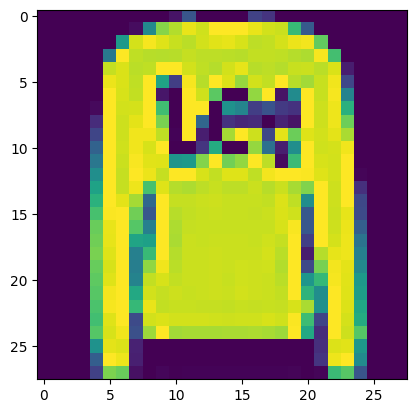

In [23]:
img2 = X_test[1]
plt.imshow(img2)

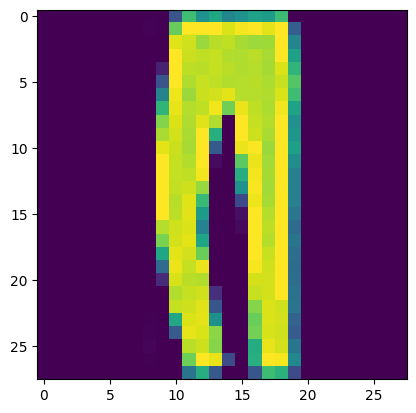

In [24]:
img3 = X_test[2]
plt.imshow(img3)